### Import Libraries

In [1]:

import pandas as pd
import numpy as np
import pathlib

from joblib import load

from utils.MlPipelineUtils import (
    get_features_data,
    get_dataset,
    get_X_y_data,
    evaluate_model_cm,
    evaluate_model_score
)

from sklearn.metrics import f1_score

### Evaluate best model

In [2]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

log_reg_model_path = pathlib.Path(f"{results_dir}/1.log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

# load training data from indexes and features dataframe
data_split_path = pathlib.Path("results/0.data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../1.format_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

### Evaluate with training data

In [3]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
X_training, y_training = get_X_y_data(training_data)
training_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
4,Polylobed,10.0,1212.640449,21.314607,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,1.764085,-0.364659,-0.623983,0.087524,-0.678471,-1.047430,0.119700,0.254014,0.080685,-0.808582
5,MetaphaseAlignment,42.0,69.902174,104.782609,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-0.030402,-0.306105,0.471312,1.111647,-0.395580,0.265579,0.337486,-0.728758,0.519263,1.143726
7,Interphase,85.0,1155.936170,191.180851,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-1.264048,-0.678396,0.076916,3.142620,0.202174,0.331271,0.567700,0.072269,-1.715632,1.303155
8,Artefact,100.0,748.324675,220.935065,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-0.834010,-0.404291,0.839559,0.230029,-0.322646,-0.254167,-0.602655,-0.273222,-0.722049,0.554533
9,Artefact,108.0,795.484536,242.752577,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-1.406520,0.368818,0.568022,1.618059,-0.320691,0.527715,0.130431,-0.293846,-0.755968,0.025133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,SmallIrregular,37.0,828.268657,338.328358,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,-0.010054,2.490791,0.112932,-0.448705,-0.573112,-1.219449,0.756078,-0.434373,-0.617329,2.989479
4304,SmallIrregular,45.0,62.742424,384.424242,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,0.828838,2.328690,2.365700,-1.219878,-0.377726,0.285707,0.072360,-0.101487,0.592109,-0.326425
4305,SmallIrregular,49.0,799.772727,407.651515,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,0.342158,1.118108,2.618269,-1.146326,-0.574519,0.284514,0.491826,-0.489022,0.969788,-0.492233
4306,SmallIrregular,52.0,105.014085,429.056338,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,-0.890952,0.301522,0.345463,0.594489,0.737245,3.037339,-0.636915,0.061156,1.849867,-0.896322


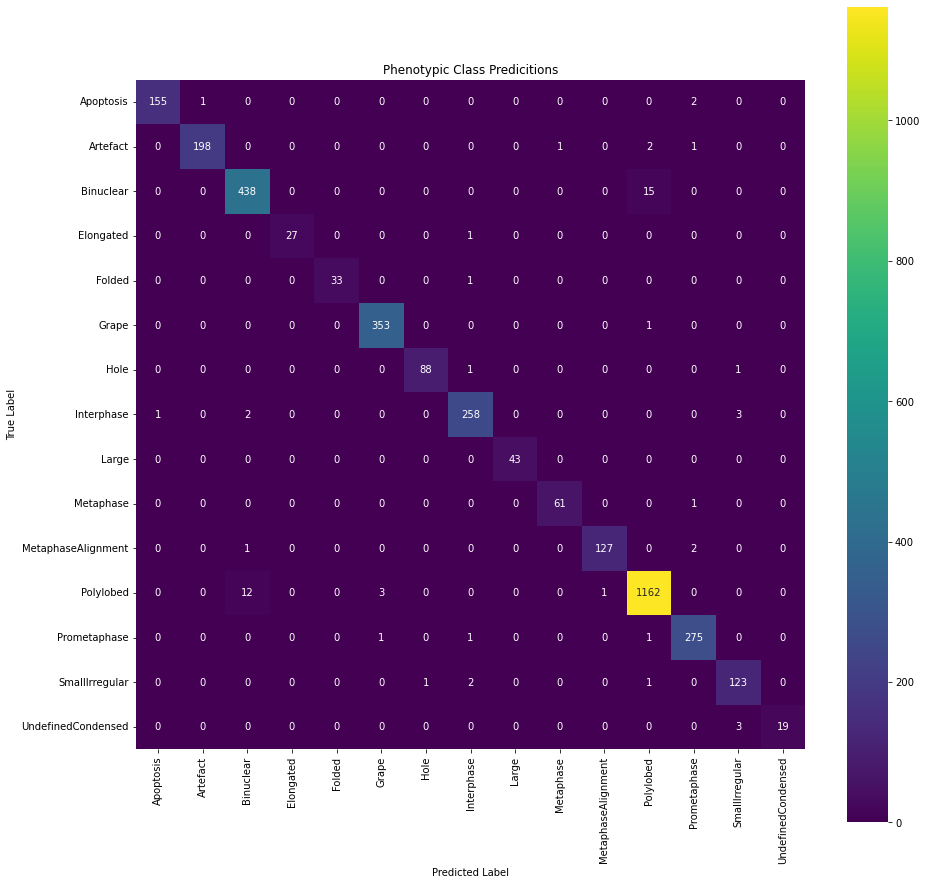

In [4]:
y_train, y_train_pred = evaluate_model_cm(log_reg_model, training_data)

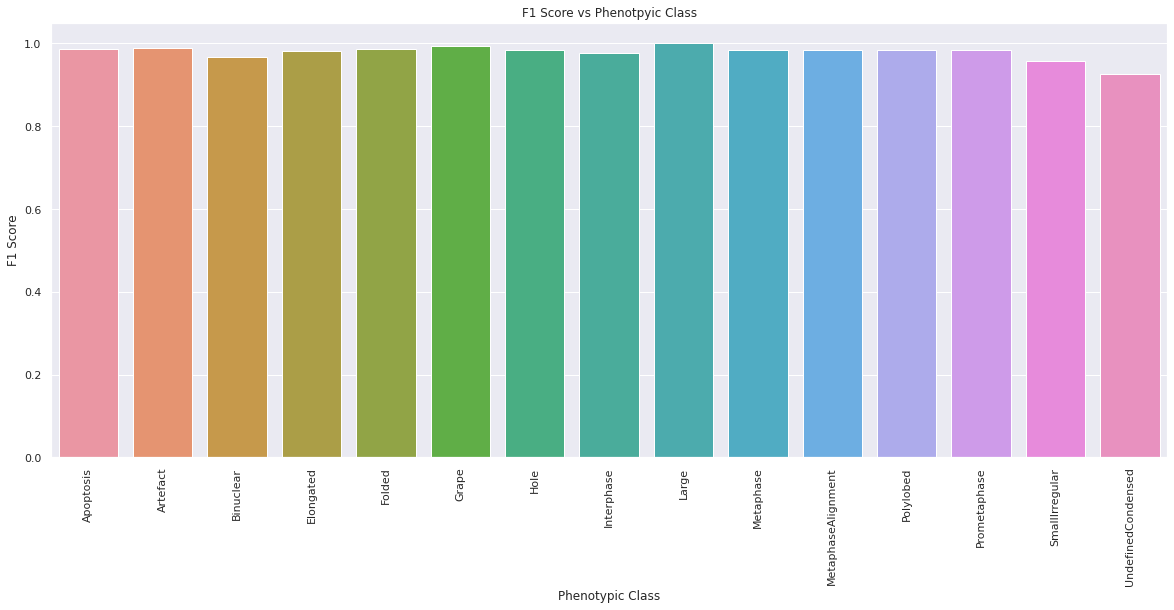

In [5]:
evaluate_model_score(log_reg_model, training_data)

### Evaluate with testing data

In [6]:
testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
1861,Binuclear,30.0,241.346667,230.146667,LT0027_44,030_58,1,LT0027_44_030_58,LT0027_44/030/58/LT0027_44_030_58.tif,ECT2,...,-0.573941,-0.820014,-0.526834,-0.408275,-0.521341,-0.961038,0.273647,0.778520,-0.394016,-0.766690
1532,Prometaphase,99.0,1314.666667,436.677083,LT0066_19,287_22,1,LT0066_19_287_22,LT0066_19/287/22/LT0066_19_287_22.tif,ch-TOG,...,0.724834,-0.668523,-0.209100,-0.574793,3.519898,-0.406855,-0.071020,-0.731387,1.274607,-1.338288
2871,Prometaphase,152.0,490.000000,973.787500,LT0048_14,335_1,1,LT0048_14_335_1,LT0048_14/335/1/LT0048_14_335_1.tif,PLK1,...,0.920628,-0.529804,1.483451,-0.577654,1.043739,0.336816,-0.303975,-1.033712,0.585853,-0.840794
1949,Polylobed,110.0,685.975309,612.419753,LT0027_44,030_86,1,LT0027_44_030_86,LT0027_44/030/86/LT0027_44_030_86.tif,ECT2,...,0.423555,-0.116250,0.557815,0.283922,0.067576,-1.760011,-0.970680,-0.831678,1.509059,1.001193
193,Polylobed,182.0,133.397260,431.958904,LT0043_48,166_47,1,LT0043_48_166_47,LT0043_48/166/47/LT0043_48_166_47.tif,OGG1,...,-0.896344,-0.153691,0.629466,-0.345324,0.040642,-0.871065,-0.356631,0.182716,-2.093855,0.193557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,Binuclear,82.0,690.144578,532.506024,LT0047_27,140_68,1,LT0047_27_140_68,LT0047_27/140/68/LT0047_27_140_68.tif,DNCH1,...,0.209759,-0.589350,-0.572986,0.193948,-0.377132,0.367718,6.762081,0.551534,-0.462422,-0.416739
1488,Grape,132.0,1118.217949,317.410256,LT0066_19,287_93,1,LT0066_19_287_93,LT0066_19/287/93/LT0066_19_287_93.tif,ch-TOG,...,0.642127,-0.602781,-0.333000,-0.594861,0.135936,0.845754,-1.109703,-1.529153,-0.788269,2.249496
3292,Polylobed,273.0,750.717647,931.011765,LT0157_04,005_78,1,LT0157_04_005_78,LT0157_04/005/78/LT0157_04_005_78.tif,ENSG00000175216,...,-0.315715,-0.125931,0.429016,0.817517,-0.351425,-1.054683,0.097828,-0.074618,-0.994463,0.232435
2983,Polylobed,48.0,519.940476,270.833333,LT0098_13,021_21,1,LT0098_13_021_21,LT0098_13/021/21/LT0098_13_021_21.tif,ENSG00000110675,...,0.671648,-0.548061,-0.179147,-0.430100,-0.417291,-0.727433,0.276425,0.593493,0.127817,-0.283417


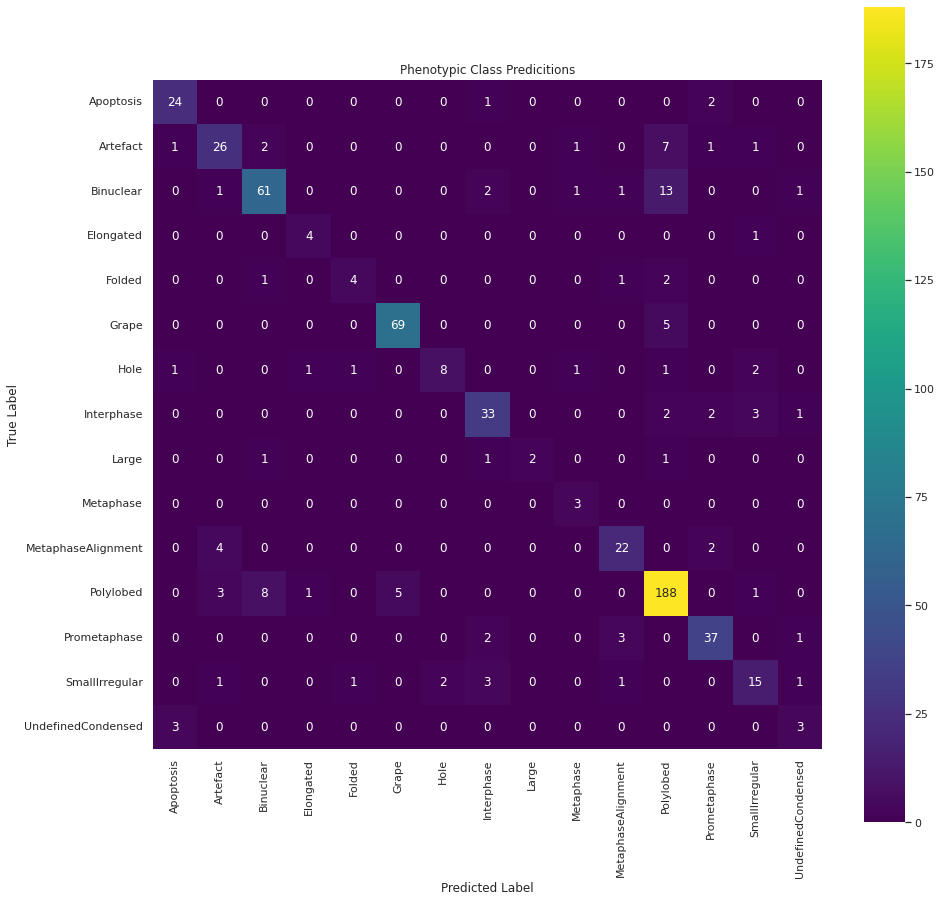

In [7]:
y_test, y_test_pred = evaluate_model_cm(log_reg_model, testing_data)

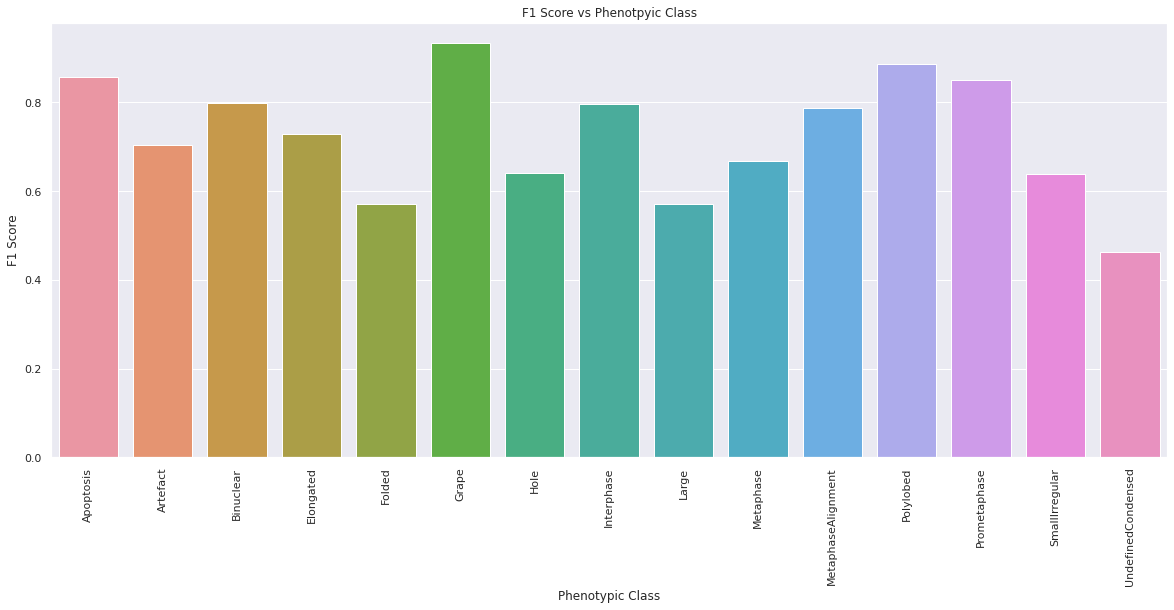

In [8]:
evaluate_model_score(log_reg_model, testing_data)

### Evaluate with holdout data

In [9]:
holdout_data = get_dataset(features_dataframe, data_split_indexes, "holdout")
X_holdout, y_holdout = get_X_y_data(holdout_data)
holdout_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
674,SmallIrregular,48.0,630.758065,202.354839,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,0.389081,0.065198,-0.343256,0.236143,0.209176,0.260897,0.612188,-0.013132,-0.025225,2.161076
679,SmallIrregular,92.0,744.358025,335.703704,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-0.982763,3.694569,-0.478552,0.147297,0.290459,0.540579,0.236525,0.182654,-0.653987,2.068226
680,SmallIrregular,109.0,771.328947,380.302632,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-1.153945,0.531941,-1.261145,-0.497467,1.106569,-0.264424,-0.394235,0.292357,-1.455229,1.538125
681,SmallIrregular,114.0,982.866667,400.120000,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-0.992404,0.623856,0.465564,-0.289329,1.530763,-0.596233,-0.498740,0.546696,0.774504,1.606204
682,UndefinedCondensed,129.0,793.867925,441.056604,LT0030_17,184_39,1,LT0030_17_184_39,LT0030_17/184/39/LT0030_17_184_39.tif,RGR,...,-0.513004,0.989208,-0.797074,-0.984831,0.815934,-0.043977,0.244709,0.897651,-1.150318,1.517273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,Polylobed,161.0,572.000000,665.526882,LT0023_04,005_72,1,LT0023_04_005_72,LT0023_04/005/72/LT0023_04_005_72.tif,MYST1,...,0.566324,-0.756251,0.404259,-0.944043,0.815236,-0.241202,-0.862862,-0.475562,0.292104,-0.587670
791,Polylobed,161.0,545.604938,672.777778,LT0023_04,005_72,1,LT0023_04_005_72,LT0023_04/005/72/LT0023_04_005_72.tif,MYST1,...,0.016118,-0.958166,0.102561,-0.919212,0.553668,-0.158311,-1.364111,-0.842621,-0.209952,-0.444297
792,Polylobed,148.0,340.634615,677.942308,LT0023_04,005_72,1,LT0023_04_005_72,LT0023_04/005/72/LT0023_04_005_72.tif,MYST1,...,-1.607949,1.287222,-0.623064,0.558888,0.652617,0.103398,-0.063701,-0.248156,-1.123649,0.296646
793,Polylobed,161.0,575.715909,682.829545,LT0023_04,005_72,1,LT0023_04_005_72,LT0023_04/005/72/LT0023_04_005_72.tif,MYST1,...,0.129889,-0.616493,0.002598,-0.965870,-0.275303,-0.344053,-1.025765,-0.772327,0.045996,0.332153


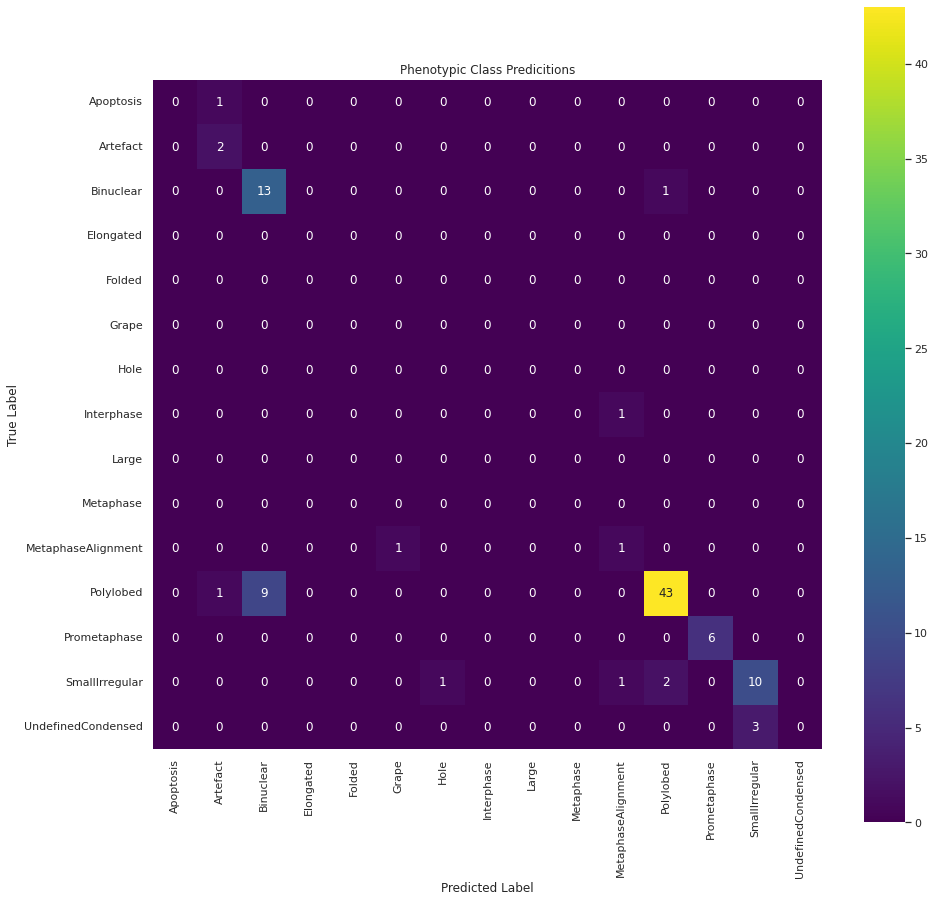

In [10]:
y_holdout, y_holdout_pred = evaluate_model_cm(log_reg_model, holdout_data)

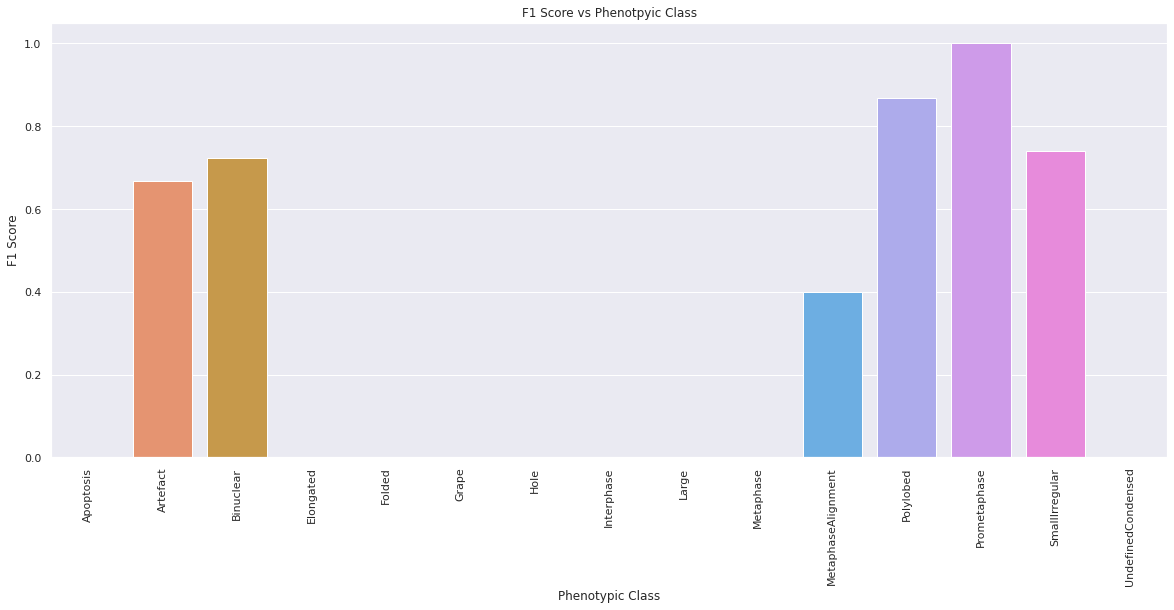

In [11]:
evaluate_model_score(log_reg_model, holdout_data)

### Save trained model predicitions

In [12]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/2.model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [13]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{results_dir}/1.shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path) 

### Evaluate with training data

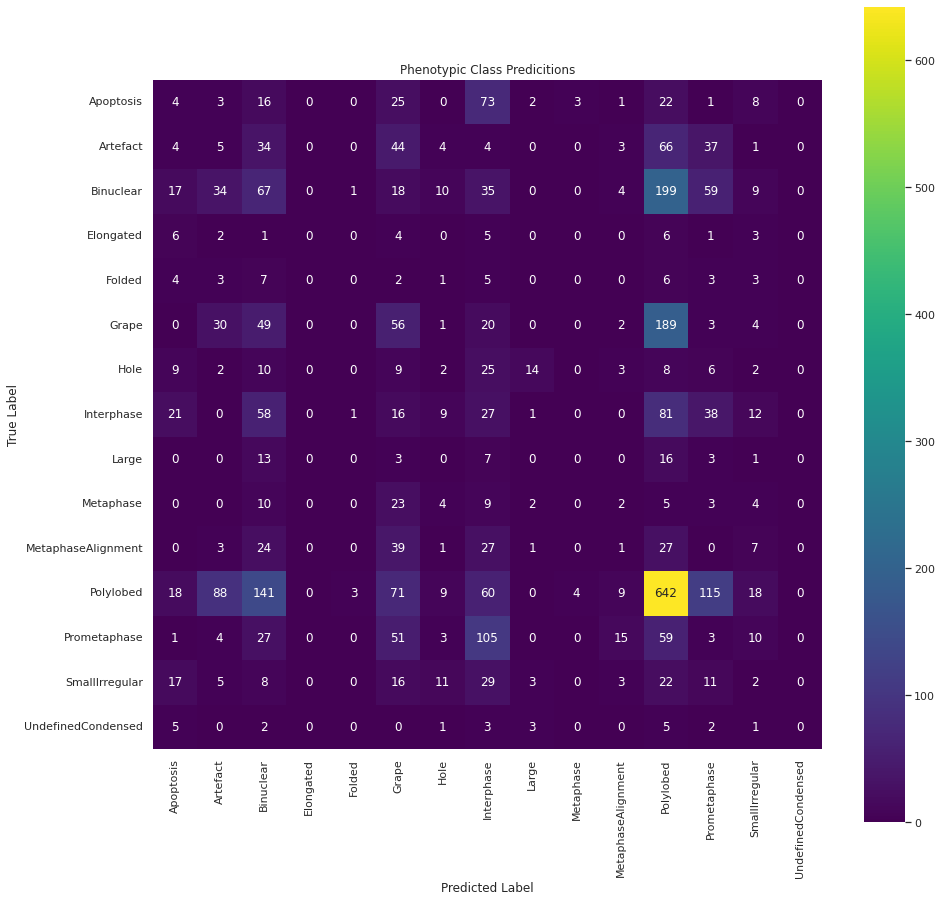

In [14]:
y_train, y_train_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, training_data)

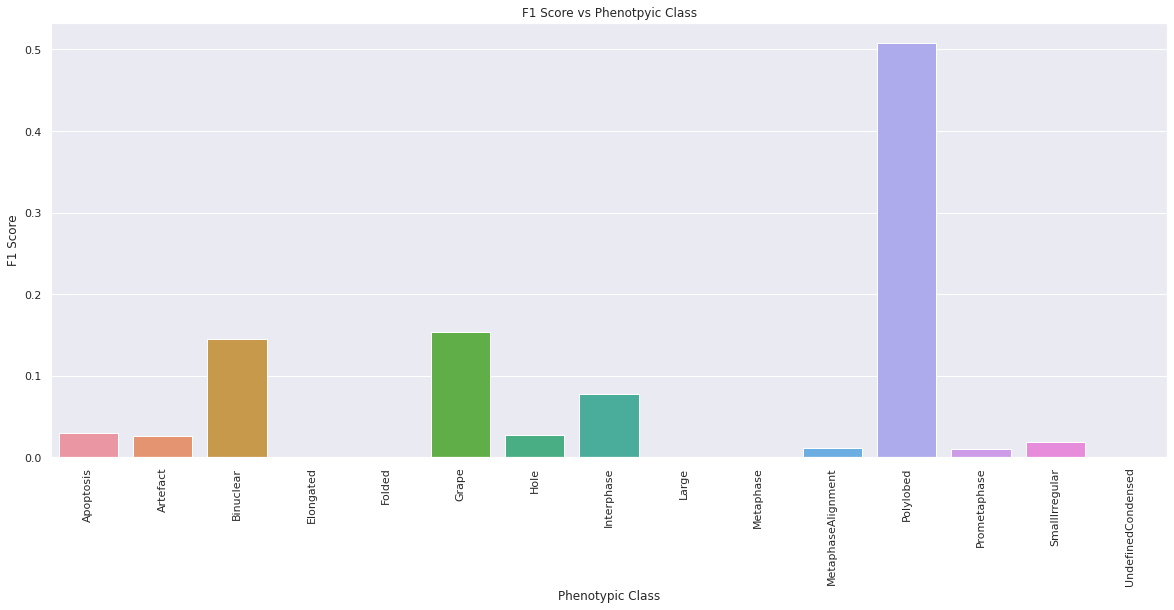

In [15]:
evaluate_model_score(shuffled_baseline_log_reg_model, training_data)

### Evaluate with testing data

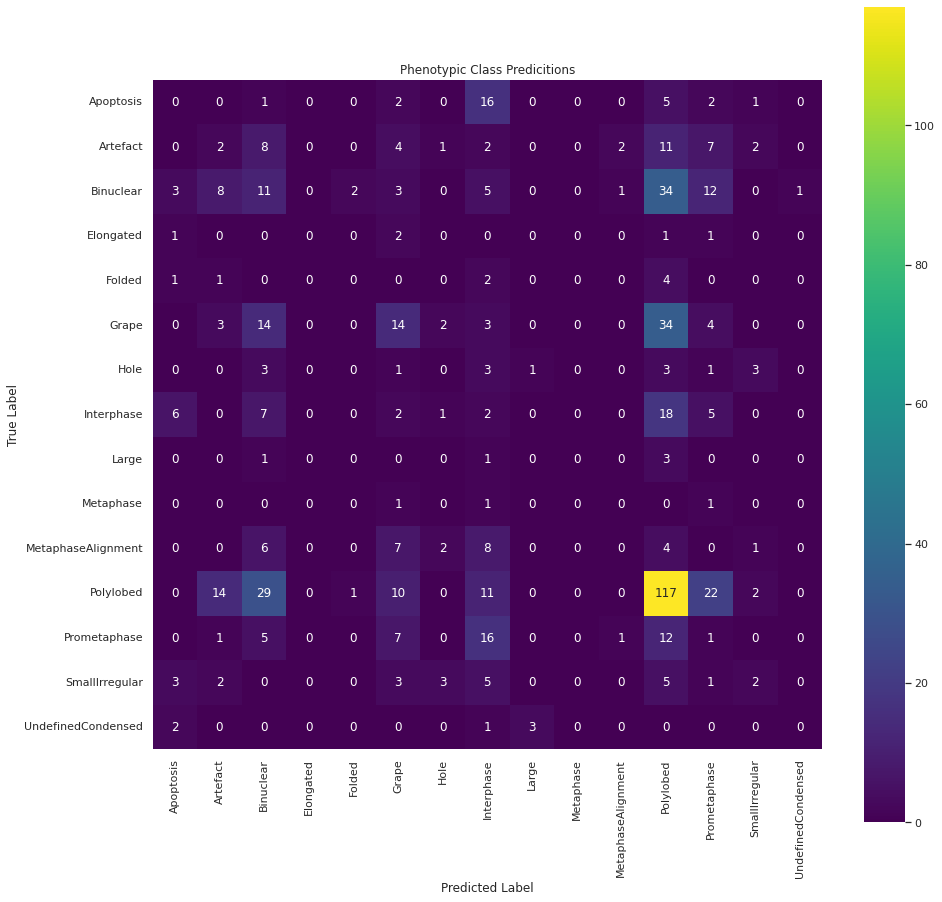

In [16]:
y_test, y_test_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, testing_data)

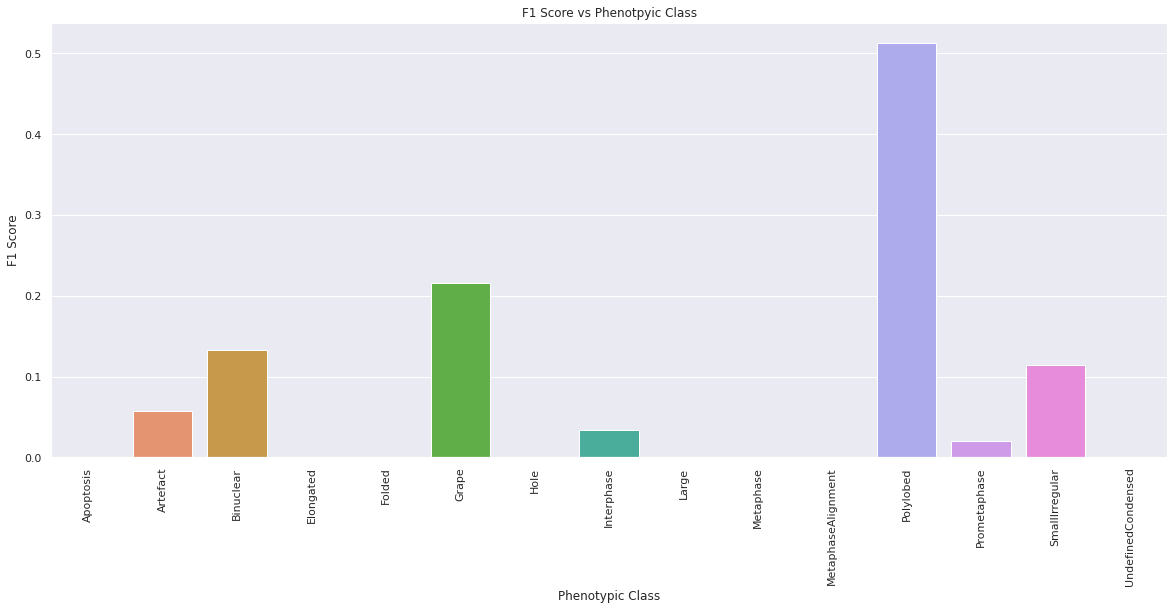

In [17]:
evaluate_model_score(shuffled_baseline_log_reg_model, testing_data)

### Evaluate with holdout data

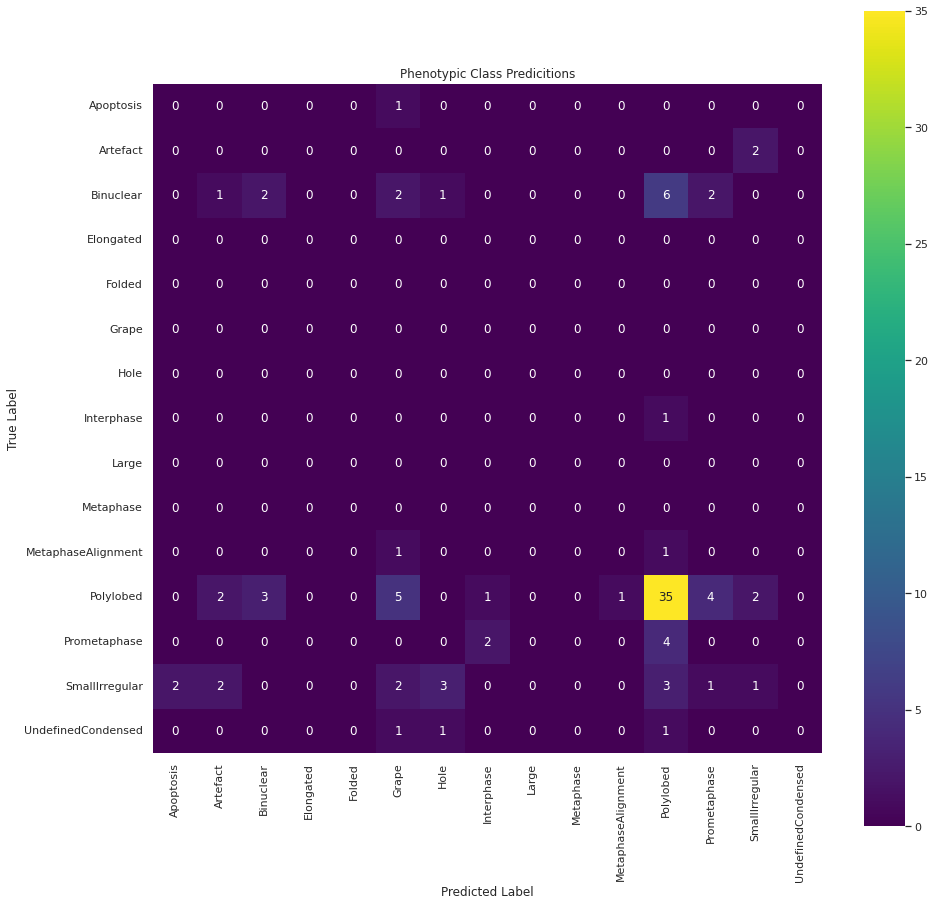

In [18]:
y_holdout, y_holdout_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, holdout_data)

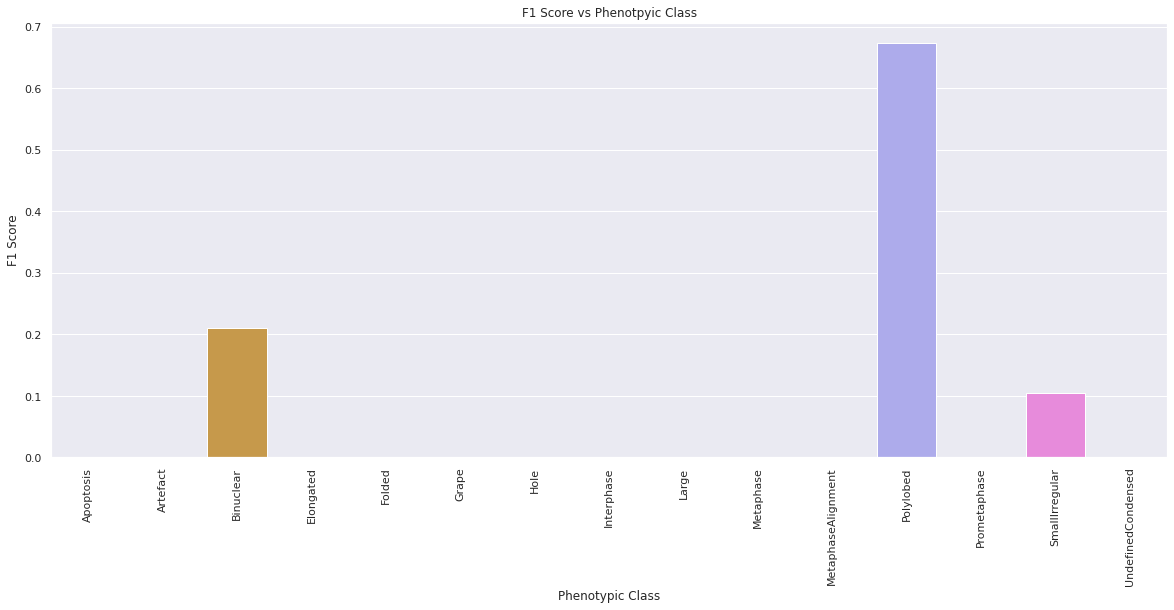

In [19]:
evaluate_model_score(shuffled_baseline_log_reg_model, holdout_data)

### Save trained model predicitions

In [20]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/2.shuffled_baseline_model_predictions.tsv", sep="\t")